# About this notebook
#### Author: Seyedsaman Emami

<hr>

|**problem**|**Dataset**|**Source of the dataset**|**Area**|
|-:|-:|-:|-:|
|Multi-class classification|Caltech101|vision.caltech.edu|COMPUTATIONAL VISION|

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 8px;
              color:white;">

<hr>
In this Notebook, I am going to investigate the Caltech101 dataset features from different aspects and prepare a clean input for the Machine learning models.

Note that this notebook does not contain any ML model. The focus of this work is to prepare a reliable dataset for the ML models.

Note that I am looking for a dataset with 324 features.

If you want to have this method or use the outputs of the notebook, you can fork the Notebook as following (**copy and Edit Kernel**).

<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F1101107%2F8187a9b84c9dde4921900f794c6c6ff9%2FScreenshot%202020-06-28%20at%201.51.53%20AM.png?generation=1593289404499991&alt=media" alt="Copyandedit" width="300" height="300" class="center">

I tried to keep everything as simple as possible, if you have any doubts or questions, please feel free to ask in the comments.

# Importing libs

In [10]:
import os
import numpy as np
import pandas as pd
from skimage.feature import hog
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from keras.applications.imagenet_utils import preprocess_input

# Import the dataset

In [2]:
path = '/kaggle/input/caltech101/101_ObjectCategories/'
root = '101_ObjectCategories'
exclude = ['BACKGROUND_Google', 'Motorbikes', 'airplanes', 'Faces_easy', 'Faces']
train_split, val_split = 0.7, 0.15

categories = [x[0] for x in os.walk(path) if x[0]][1:]
categories = [c for c in categories if c not in [os.path.join(path, e) for e in exclude]]

pd.Series(categories).head()

0    /kaggle/input/caltech101/101_ObjectCategories/...
1    /kaggle/input/caltech101/101_ObjectCategories/...
2    /kaggle/input/caltech101/101_ObjectCategories/...
3    /kaggle/input/caltech101/101_ObjectCategories/...
4    /kaggle/input/caltech101/101_ObjectCategories/...
dtype: object

# Feature engineering
<hr>
<h5> A method for resizing, extracting, and feature engineering </h5>

In [3]:
def get_image(path):
    img = image.load_img(path, target_size=(64, 64))
    fd, hog_image = hog(img, orientations=9,
                    pixels_per_cell=(16, 16),
                    cells_per_block=(2, 2),
                    visualize=True,
                    multichannel=True) 
    return img, fd

# Creat a dataset

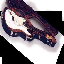

In [4]:
data = []
for c, category in enumerate(categories):
    images = [os.path.join(dp, f) for dp, dn, filenames 
              in os.walk(category) for f in filenames 
              if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]

    for img_path in images:
            img, fd = get_image(img_path)
            data.append({'x':fd, 'y':c})
img

## Dataset in a glance

In [5]:
pd.Series(data).head()

0    {'x': [0.08405299139632087, 0.0396517370633146...
1    {'x': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
2    {'x': [0.20962450266259158, 0.1208143716009737...
3    {'x': [0.07260660963826313, 0.0410636223655815...
4    {'x': [0.022473596301589814, 0.010071051910481...
dtype: object

### Defining the X, and y

In [9]:
X, y = np.array([t["x"] for t in data]), np.array([t["y"] for t in data] )
print('\n', 'x shape:', X.shape,
      '\n', 'y shape:', y.shape,
      '\n', 'num_classes:', len(np.unique(y)))


 x shape: (6209, 324) 
 y shape: (6209,) 
 num_classes: 97


In [7]:
pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1).head(5)

,0,1,2,3,4,5,6,7,8,9,...,315,316,317,318,319,320,321,322,323,0
0,0.084053,0.039652,0.058436,0.118278,0.214022,0.176665,0.072908,0.054929,0.063952,0.243372,...,0.224716,0.153501,0.106937,0.105205,0.168385,0.111264,0.162875,0.120218,0.136363,0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.067806,0.073522,0.229384,0.102652,0.229384,0.086596,0.159627,0.113625,0.083444,0
2,0.209625,0.120814,0.137439,0.089876,0.209625,0.145928,0.130102,0.166245,0.114534,0.209625,...,0.135436,0.065144,0.096067,0.211106,0.215354,0.181953,0.094210,0.114700,0.077615,0
3,0.072607,0.041064,0.048203,0.071532,0.066485,0.036628,0.044320,0.047600,0.031668,0.087427,...,0.171166,0.123649,0.105418,0.109931,0.177014,0.078569,0.118419,0.095165,0.124579,0
4,0.022474,0.010071,0.013220,0.010436,0.020069,0.010316,0.010136,0.003935,0.003288,0.054426,...,0.085797,0.026678,0.040462,0.044062,0.047826,0.022383,0.027298,0.024110,0.005799,0


# splitting the data

In [11]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)

In [12]:
print('\n', 'x_train shape:', x_train.shape,
      '\n', 'x_test shape:', x_test.shape)


 x_train shape: (4346, 324) 
 x_test shape: (1863, 324)
